 Face recognized as person 1


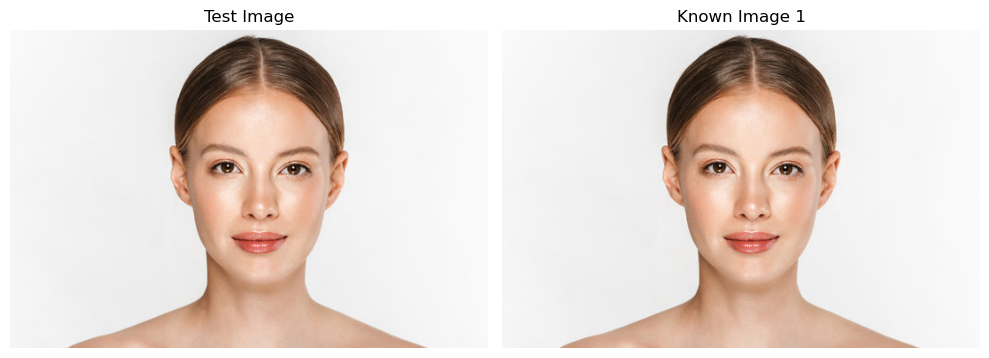

In [2]:
# Import required libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read test image
test_image = cv2.imread(r'faceimg.jpg')

# Read known images (you can add more if needed)
known_images = [cv2.imread(r'faceimg.jpg') for _ in range(1)]

# Check if images exist
if test_image is None or any(img is None for img in known_images):
    raise FileNotFoundError(" Check that all image paths are correct and files exist in the folder.")

# Function to calculate color histogram
def calc_hist(img):
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8],
                        [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Calculate histogram for test image
test_hist = calc_hist(test_image)

# Compare with known images
distances = [cv2.compareHist(test_hist, calc_hist(kimg), cv2.HISTCMP_BHATTACHARYYA)
             for kimg in known_images]

# Find the smallest distance (most similar)
recognized_index = np.argmin(distances)

# Threshold for recognition (adjust if needed)
if distances[recognized_index] <= 0.5:
    print(f" Face recognized as person {recognized_index + 1}")
else:
    print(" Face not recognized")

# Display images
plt.figure(figsize=(10, 5))
plt.subplot(1, len(known_images) + 1, 1)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title('Test Image')
plt.axis('off')

for i, kimg in enumerate(known_images):
    plt.subplot(1, len(known_images) + 1, i + 2)
    plt.imshow(cv2.cvtColor(kimg, cv2.COLOR_BGR2RGB))
    plt.title(f'Known Image {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()
